<a href="https://colab.research.google.com/github/iniyan1984/Regression/blob/main/distribute_linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Multiple Ways

!git init; git pull https://github.com/YOUR_USERNAME/Regression.git

In [2]:
!git init; git pull https://github.com/iniyan1984/Regression.git

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 160 (delta 2), reused 156 (delta 0), pack-reused 0
Receiving objects: 100% (160/160), 19.11 MiB | 31.87 MiB/s, done.
Resolving deltas: 100% (2/2), done.
From https://github.com/iniyan1984/Regression
 * branch            HEAD       -> FETCH_HEAD


In [3]:
!ls

distribute_linreg.ipynb  lecture.pdf   README.md
images			 linreg.ipynb  sample_data


## Making the data

We'll first construct a synthetic data set..using a function from the `scikit-learn` library. Synthetic data is nice in the sense that we can constrain how the noise behaves, and thus isolate effects.

In [5]:
%matplotlib inline
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

This data is generated from the canonical generating process assumed for linear regression: a gaussian distribution centered at the regression line on the y axis.

In [6]:
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html
X, y, coef = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=20,
                       random_state=2017,
                       bias=0.0,
                       coef=True)

Notice that the X is in the canonical array-of-arrays format.
**Try and print its shape**

In [11]:
# your code here
X.shape,y.shape

((100, 1), (100,))

In [9]:
X

array([[ 0.03225343],
       [-0.43717257],
       [-0.14039799],
       [-0.28942671],
       [-1.43048995],
       [-0.86109055],
       [-0.95908022],
       [-0.52824237],
       [-0.18007786],
       [ 1.81894788],
       [-1.50157469],
       [ 1.07524045],
       [-0.53757079],
       [-0.33654744],
       [-0.69333384],
       [ 0.18613021],
       [-0.35285906],
       [-0.59573347],
       [-0.95284841],
       [ 1.37214258],
       [-1.00148098],
       [ 0.59405599],
       [ 1.98893004],
       [-0.84764818],
       [ 0.21276995],
       [-0.86352344],
       [-0.44574656],
       [-1.08669572],
       [ 0.88578638],
       [-0.39457786],
       [-0.75808346],
       [ 0.21445342],
       [-0.91772873],
       [ 1.18192126],
       [-1.23456807],
       [ 1.51028721],
       [ 0.36908201],
       [ 0.07800759],
       [ 0.92827925],
       [ 0.91180261],
       [ 0.50541435],
       [ 0.39476163],
       [-1.40727442],
       [ 1.33682587],
       [ 0.28914398],
       [ 0

We are fitting a model with an intercept. Lets see what it is.

In [12]:
coef

array(80.88336208)

We can plot the data.

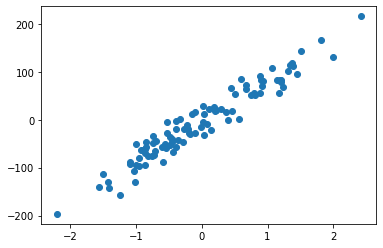

In [13]:
plt.plot(X,y, 'o');

For the purposes of drawing the regression line, lets create a uniform grid of points, and then reshape it into the canonical format

In [14]:
xgrid = np.linspace(-2.5,2.5,1000)
Xgrid = xgrid.reshape(-1,1)

## Fit using sklearn

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()
lr.fit(X,y) # fit the model with the existing data
ypgrid = lr.predict(Xgrid) # now predict it on the grid
lr.coef_, lr.intercept_ # get the slope and the intercept

(array([82.90456142]), -3.709228868670302)

Notice that the slope and the intercept are not what we fed into the model, but close. This is because the model fitted depends on the exact way points were generated..

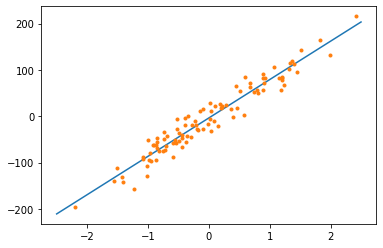

In [17]:
plt.plot(Xgrid, ypgrid)
plt.plot(X, y, '.')

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(y, lr.predict(X))

0.9342344891672815

## The impact of samples

We'll sample 20 points from the data set. We do this by sampling 20 indices, index into X and y, and then fit on the sample

In [ ]:
sample_indices = np.random.choice(range(100), size=20, replace=False)
sample_indices

We create a sample by using the sample indices:

In [ ]:
Xsample = X[sample_indices]
ysample = y[sample_indices]

**Find the $R^2$ score of a fit to this sample, on this sample**

In [ ]:
# your code here


Lets check the sensitivity of our prediction to our sample. We'll do this 1000 times..that is we'll sample a new set of 20 points, 

In [ ]:
scores = []
models=[]
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=20, replace=False)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    m = LinearRegression().fit(Xsample, ysample)
    models.append(m)
    scores.append(m.score(Xsample, ysample))
plt.hist(scores,  bins=np.linspace(0.7, 1, 30))
plt.xlim(0.7,1)

Let us check the slope and intercepts fitted on the different samples

In [ ]:
plt.hist([models[i].coef_[0] for i in range(1000)], bins=10);
plt.xlim([60, 100])

In [ ]:
plt.hist([models[i].intercept_ for i in range(100)], bins=10);
plt.xlim([-15, 10])

## The impact of noise

**Redo this with a higher amount of noise (about 400)**. For this you will need to create a new dataset. Plot the data. Plot the histogram of the R^2 as well as that of the coefficients.

In [ ]:
# your code here


In [ ]:
# your code here


In [ ]:
# your code here


In [ ]:
# your code here


## Impact of sample size

Going back to the original dataset with less noise, now fetch smaller size samples  (10 data points each) and repeat

In [ ]:
# your code here


In [ ]:
# your code here


In [ ]:
plt.hist([models[i].intercept_ for i in range(100)], bins=10);
plt.xlim([-15, 10])

## Testing and training

A grid like the one we created might contain some of the points we fit this model on. This is called **Data Contamination** and is a big no-no. If we want an independent estimate of the error, we should hold out some points in a test set. Then we want to guarantee that there is no overlap between the initial sample, or **training set**, and the test set.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2017)

In [24]:
Xtrain.shape,Xtest.shape

((80, 1), (20, 1))

Now lets fit the model on the training set and evaluate it both on the training set and the test set. We print the R^2

In [25]:
lr2 = LinearRegression().fit(Xtrain, ytrain)
r2_test = r2_score(ytest, lr.predict(Xtest))
r2_train = r2_score(ytrain, lr.predict(Xtrain))

In [26]:
"Train R2 is {}, while test R^2 is {}".format(r2_train, r2_test)

'Train R2 is 0.9302930567263316, while test R^2 is 0.9446796445954511'

## Using Keras to fit the model

We'll use SGD (we could have used plain and simple gradient descent, why?) and Keras's Sequential API

In [27]:
from keras.models import Sequential
from keras.layers import Dense
lr3 = Sequential()
lr3.add(Dense(1, input_shape=(1,)))
lr3.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mse','accuracy'])
lr3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = lr3.fit(Xtrain, ytrain, epochs=100, batch_size=20)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 4188.8170 - mse: 4188.8170 - accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 4516.3730 - mse: 4516.3730 - accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 3949.4890 - mse: 3949.4889 - accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 3641.4615 - mse: 3641.4615 - accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 3195.7979 - mse: 3195.7979 - accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 3103.3938 - mse: 3103.3938 - accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 2520.0878 - mse: 2520.0878 - accuracy: 0.0000e+00
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 2320.4189 - mse: 2320.4189 - accuracy: 0.0000e+00
Epoch 9/100
4/4 [===============

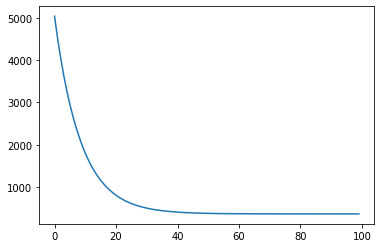

In [29]:
plt.plot(history.history['loss'])

In [30]:
lr3.get_weights()

[array([[82.39118]], dtype=float32), array([-3.4032848], dtype=float32)]